### Example 1: Diet Problem

**Problem Statement:**
A nutritionist wants to design a diet that meets the daily nutritional requirements at the lowest possible cost. The diet consists of different food items, each with a specific cost and nutritional content (e.g., calories, protein, fat). The goal is to minimize the cost while ensuring that the diet meets minimum daily nutritional requirements.

**Mathematical Model:**

Let:
- $x_i $ be the quantity of food item $i $ in the diet.
- $c_i $ be the cost per unit of food item $i $.
- $a_{ij} $ be the amount of nutrient $j $ in one unit of food item $i $.
- $b_j $ be the minimum requirement of nutrient $j $.

**Objective:**
Minimize the total cost:

$
\text{Minimize } \sum_i c_i x_i
$

**Constraints:**
For each nutrient $j $:

$
\sum_i a_{ij} x_i \geq b_j
$
$x_i \geq 0 $ for all $i $.


In [1]:
import gurobipy as gp
from gurobipy import GRB

# Parameters
foods = ["Bread", "Milk", "Eggs"]
costs = {"Bread": 0.5, "Milk": 1.0, "Eggs": 0.2}
nutrition = {
    "Calories": {"Bread": 100, "Milk": 150, "Eggs": 70},
    "Protein": {"Bread": 4, "Milk": 8, "Eggs": 6},
    "Fat": {"Bread": 1, "Milk": 5, "Eggs": 5}
}
requirements = {"Calories": 3000, "Protein": 50, "Fat": 70}

# Model
model = gp.Model("Diet Problem")

# Decision variables
food_vars = model.addVars(foods, name="x", vtype=GRB.CONTINUOUS, lb=0)

# Objective function
model.setObjective(gp.quicksum(costs[i] * food_vars[i] for i in foods), GRB.MINIMIZE)

# Constraints
for nutrient, req in requirements.items():
    model.addConstr(
        gp.quicksum(nutrition[nutrient][i] * food_vars[i] for i in foods) >= req,
        name=nutrient
    )

    # add maximum constraint for each food
    for food in foods:
        model.addConstr(food_vars[food] <= 20)

# Optimize
model.optimize()

# Display solution
for v in model.getVars():
    print(f"{v.varName}: {v.x}")

print(f"Optimal cost: {model.objVal}")


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-17
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Gentoo Linux")

CPU model: Intel(R) Core(TM) i9-14900K, instruction set [SSE2|AVX|AVX2]
Thread count: 32 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 12 rows, 3 columns and 18 nonzeros
Model fingerprint: 0x254323d8
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [2e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+03]
Presolve removed 9 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 3 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.137500e+02   0.000000e+00      0s
       1    1.2000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.200000000e+01
x[Bread]: 16.0
x[Milk]: 0.0
x[Eggs]: 20.0
Opti

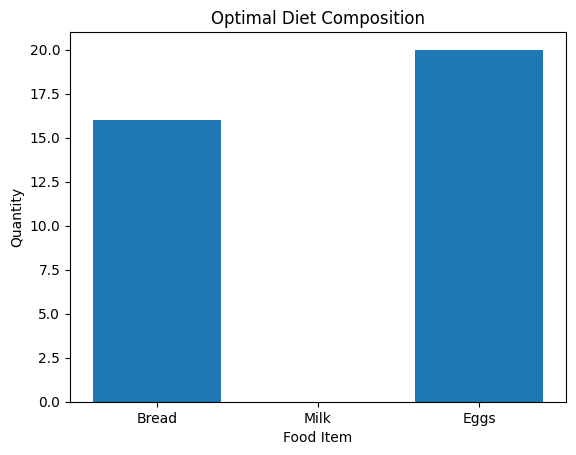

In [2]:
import matplotlib.pyplot as plt

quantities = [v.x for v in model.getVars()]
plt.bar(foods, quantities)
plt.xlabel('Food Item')
plt.ylabel('Quantity')
plt.title('Optimal Diet Composition')
plt.show()



### Example 2: Transportation Problem

**Problem Statement:**
A company needs to transport goods from multiple warehouses to several stores. Each warehouse has a limited supply, and each store has a demand. The goal is to minimize the transportation cost.

**Mathematical Model:**

Let:
- $x_{ij} $ be the number of units transported from warehouse $i $ to store $j $.
- $c_{ij} $ be the cost per unit of transporting from warehouse $i $ to store $j $.
- $s_i $ be the supply at warehouse $i $.
- $d_j $ be the demand at store $j $.

**Objective:**
Minimize the total transportation cost:
$
\text{Minimize } \sum_{i,j} c_{ij} x_{ij}
$

**Constraints:**
Supply constraints for each warehouse $i $:
$
\sum_j x_{ij} \leq s_i
$
Demand constraints for each store $j $:
$
\sum_i x_{ij} \geq d_j
$
$x_{ij} \geq 0 $ for all $i, j $.



In [3]:
# Parameters
warehouses = ["W1", "W2"]
stores = ["S1", "S2", "S3"]
costs = {
    ("W1", "S1"): 2, ("W1", "S2"): 3, ("W1", "S3"): 1,
    ("W2", "S1"): 5, ("W2", "S2"): 4, ("W2", "S3"): 7
}
supply = {"W1": 100, "W2": 150}
demand = {"S1": 80, "S2": 100, "S3": 70}

# Model
model = gp.Model("Transportation Problem")

# Decision variables
transport_vars = model.addVars(warehouses, stores, name="x", vtype=GRB.CONTINUOUS, lb=0)

# Objective function
model.setObjective(gp.quicksum(costs[i, j] * transport_vars[i, j] for i in warehouses for j in stores), GRB.MINIMIZE)

# Constraints
for i in warehouses:
    model.addConstr(gp.quicksum(transport_vars[i, j] for j in stores) <= supply[i], name=f"Supply_{i}")
for j in stores:
    model.addConstr(gp.quicksum(transport_vars[i, j] for i in warehouses) >= demand[j], name=f"Demand_{j}")

# Optimize
model.optimize()

# Display solution
for v in model.getVars():
    print(f"{v.varName}: {v.x}")

print(f"Optimal cost: {model.objVal}")


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Gentoo Linux")

CPU model: Intel(R) Core(TM) i9-14900K, instruction set [SSE2|AVX|AVX2]
Thread count: 32 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 5 rows, 6 columns and 12 nonzeros
Model fingerprint: 0x73745d63
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+01, 2e+02]
Presolve time: 0.00s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.500000e+02   0.000000e+00      0s
       5    7.8000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds (0.00 work units)
Optimal objective  7.800000000e+02
x[W1,S1]: 30.0
x[W1,S2]: 0.0
x[W1,S3]: 70.0
x[W2,S1]: 50.0
x[W2,S2]: 100.0
x[W2,S3]: 0.0
Optimal cost: 780.0


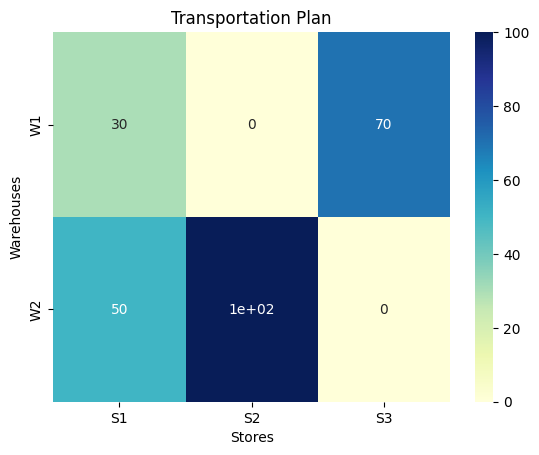

In [4]:
import seaborn as sns
import numpy as np

transport_matrix = np.array([[transport_vars[i, j].x for j in stores] for i in warehouses])
sns.heatmap(transport_matrix, annot=True, cmap="YlGnBu", xticklabels=stores, yticklabels=warehouses)
plt.xlabel('Stores')
plt.ylabel('Warehouses')
plt.title('Transportation Plan')
plt.show()
